# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [1]:
# Instalação de bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from IPython.display import HTML
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns


/tmp/ipykernel_26532/1843263716.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_26532/1843263716.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [2]:
# Responda aqui a primeira etapa
dados = pd.read_csv("dados (1).csv")

print("Quantidade de linhas: ", dados.shape[0], "\nQuantidade de colunas: ", dados.shape[1])
print("Tipo de dados nas colunas: ", dados.dtypes.to_list())
print("Quantidade de dados vazios: \n", dados.isnull().sum().to_list())
print("Colunas do dataset: \n", dados.columns.to_list())
print("Começo do dataset: \n", dados.head())
dados = dados.drop(columns=['notes'])
dados.fillna(0)
dados_com_publico = dados
dados = dados.drop(columns=['attendance'])

print(dados['result'].value_counts())
print("A coluna de público foi isolada, e a de anotações foi retirada, pois estava totalmente vazia.")


Quantidade de linhas:  1389 
Quantidade de colunas:  28
Tipo de dados nas colunas:  [dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('O')]
Quantidade de dados vazios: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 696, 0, 0, 0, 0, 1389, 0, 0, 1, 0, 0, 0, 0, 0]
Colunas do dataset: 
 ['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team']
Começo do dataset: 
    Unnamed: 0        date   time            comp        round  day venue  \
0

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

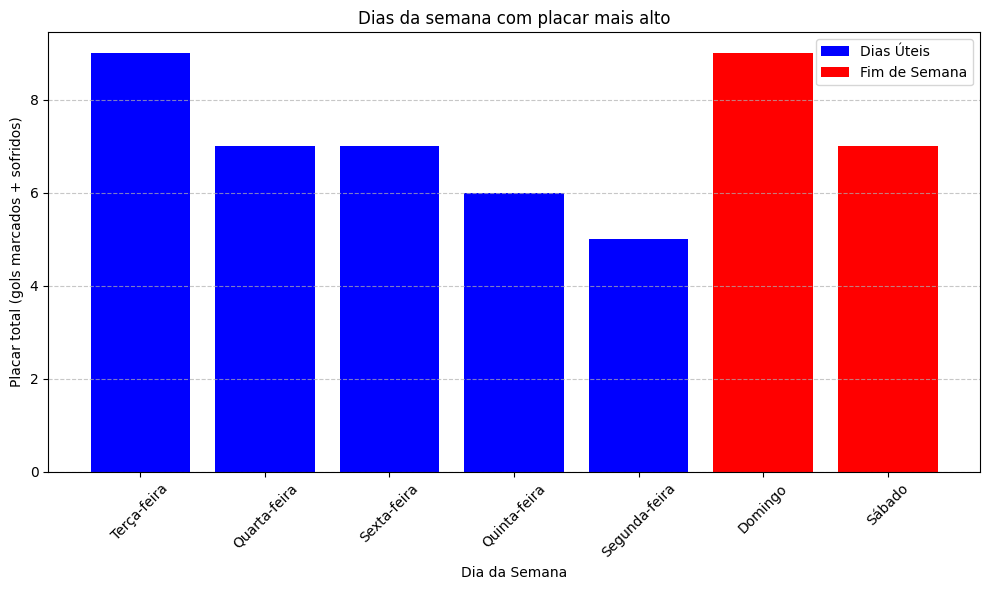

In [3]:
mapeamento_dias = {
    'Sat': 'Sábado',
    'Sun': 'Domingo',
    'Mon': 'Segunda-feira',
    'Tue': 'Terça-feira',
    'Wed': 'Quarta-feira',
    'Thu': 'Quinta-feira',
    'Fri': 'Sexta-feira'
}
dados['day'] = dados['day'].replace(mapeamento_dias)
dados['total_gols'] = dados['ga'] + dados['gf']
dados_fim_de_semana = dados[dados['day'].isin(['Sábado', 'Domingo'])]
dados_dias_uteis = dados[~dados['day'].isin(['Sábado', 'Domingo'])]
dados_dias_uteis_sorted = dados_dias_uteis.sort_values(by='total_gols', ascending=False)
dados_fim_de_semana_sorted = dados_fim_de_semana.sort_values(by='total_gols', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(dados_dias_uteis_sorted['day'], dados_dias_uteis_sorted['total_gols'], color='blue', label='Dias Úteis')
plt.bar(dados_fim_de_semana_sorted['day'], dados_fim_de_semana_sorted['total_gols'], color='red', label='Fim de Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Placar total (gols marcados + sofridos)')
plt.title('Dias da semana com placar mais alto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

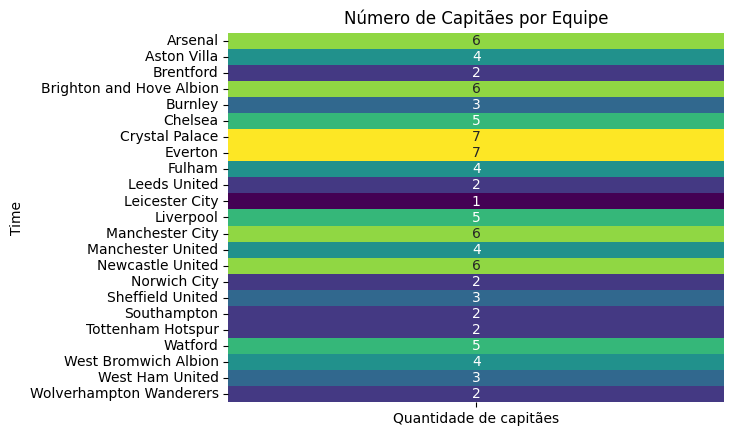

In [4]:
# Responda a etapa aqui
captain_counts = dados.groupby('team')['captain'].nunique().reset_index()
captain_counts.columns = ['Time', 'Quantidade de capitães']
heatmap_data = captain_counts.pivot_table(index='Time', values='Quantidade de capitães')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=False)
plt.title('Número de Capitães por Equipe')
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

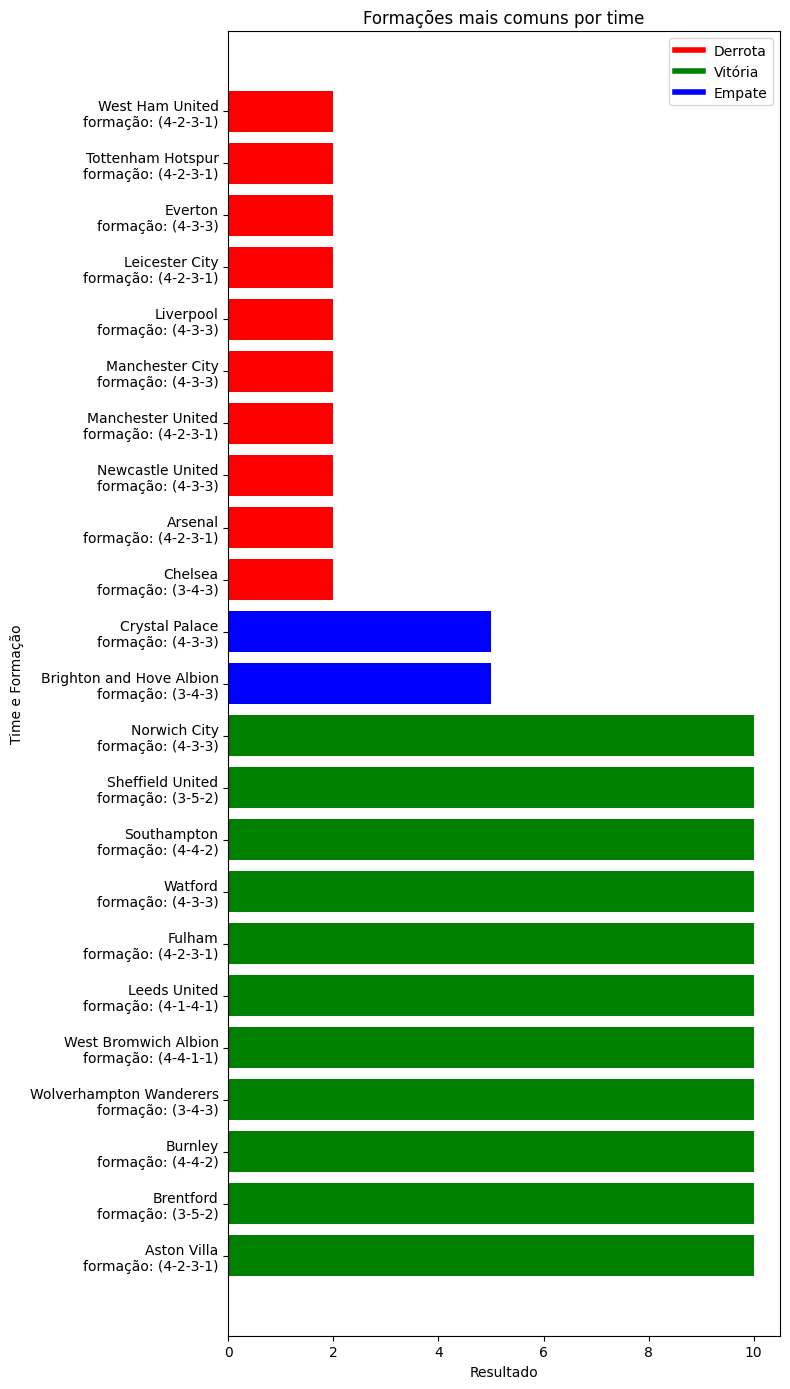

In [5]:
# Responda a etapa aqui
mapeamento_result = {
    'L': 'Vitória',
    'W': 'Derrota',
    'D': 'Empate'
}
dados['result'] = dados['result'].replace(mapeamento_result)
formacoes_resultados_comuns = dados.groupby(['team', 'formation', 'result']).size().reset_index(name='counts')
formacoes_resultados_mais_comuns = formacoes_resultados_comuns.loc[formacoes_resultados_comuns.groupby('team')['counts'].idxmax()]
df = formacoes_resultados_mais_comuns[['team', 'formation', 'result']]
df['value'] = df['result']
mapeamento_result_2 = {
    'Vitória': 10,
    'Derrota': 2,
    'Empate': 5
}
df['value'] = df['value'].replace(mapeamento_result_2)
df.reset_index(drop=True, inplace=True)
df = df.sort_values(by='value', ascending=False).reset_index(drop=True)

colors = df['result'].map({'Derrota': 'red', 'Vitória': 'green', 'Empate': 'blue'})

plt.figure(figsize=(8, 14))
bars = plt.barh(df.index, df['value'], color=colors)

plt.xlabel('Resultado')
plt.ylabel('Time e Formação')
plt.title('Formações mais comuns por time')
plt.yticks(df.index, df['team'] + '\nformação: (' + df['formation'] + ')')

legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='Derrota'),
    Line2D([0], [0], color='green', lw=4, label='Vitória'),
    Line2D([0], [0], color='blue', lw=4, label='Empate')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

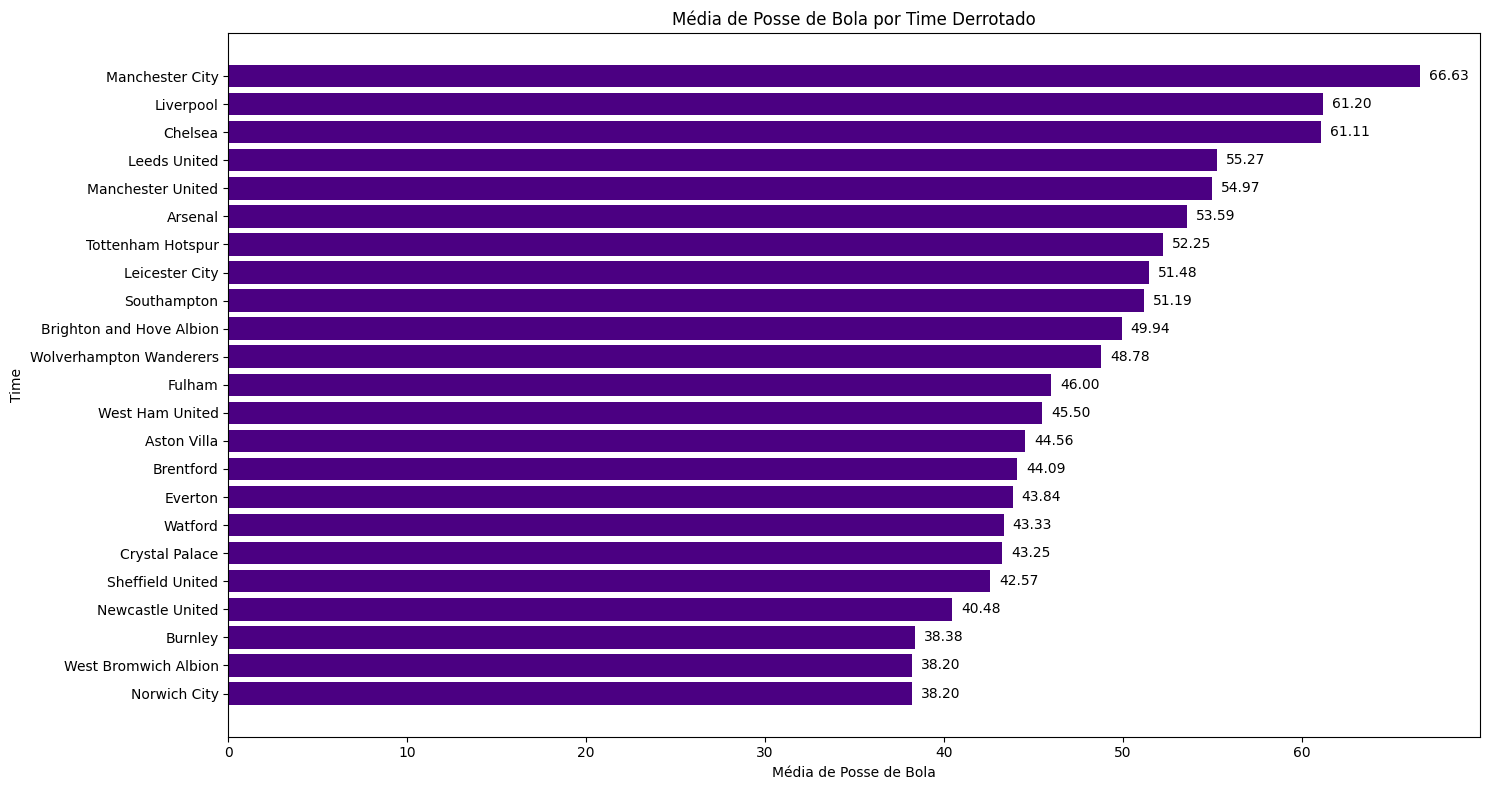

In [6]:
dados_derrota = dados[dados['result'] == 'Derrota']
mean_poss = dados_derrota.groupby('team')['poss'].mean().reset_index()
mean_poss = mean_poss.sort_values(by='poss')
plt.figure(figsize=(15, 8))
bars = plt.barh(mean_poss['team'], mean_poss['poss'], color='indigo')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left')

plt.xlabel('Média de Posse de Bola')
plt.ylabel('Time')
plt.title('Média de Posse de Bola por Time Derrotado')
plt.tight_layout()
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [7]:
# Responda a etapa aqui
dados['pontos'] = dados['result']
mapeamento_result_3 = {
    'Vitória': 3,
    'Derrota': 0,
    'Empate': 1
}

dados['pontos'] = dados['pontos'].replace(mapeamento_result_3)
dados.reset_index(drop=True, inplace=True)
dados_soma = dados.groupby('team')['pontos'].sum().reset_index()
dados_soma = dados_soma.rename(columns={'pontos': 'soma_pontos'})
dados_soma = dados_soma.sort_values(by='soma_pontos', ascending=False)
dados_soma.reset_index(drop=True, inplace=True)
logo_urls = {
    'Watford': 'https://upload.wikimedia.org/wikipedia/pt/0/00/Watford_FC_Logo.png',
    'Norwich City': 'https://upload.wikimedia.org/wikipedia/pt/e/e2/Norwich_City_FC.png',
    'Everton': 'https://upload.wikimedia.org/wikipedia/pt/a/ae/Everton_FC_logo_2014.png',
    'Burnley': 'https://upload.wikimedia.org/wikipedia/pt/3/37/Burnley_F.C._logo.png',
    'Leeds United': 'https://upload.wikimedia.org/wikipedia/en/thumb/5/54/Leeds_United_F.C._logo.svg/1200px-Leeds_United_F.C._logo.svg.png',
    'Brentford': 'https://upload.wikimedia.org/wikipedia/pt/5/5a/Brentford_FC.png',
    'Aston Villa': 'https://upload.wikimedia.org/wikipedia/en/thumb/9/9a/Aston_Villa_FC_new_crest.svg/1200px-Aston_Villa_FC_new_crest.svg.png',
    'Southampton': 'https://upload.wikimedia.org/wikipedia/pt/thumb/5/54/Southampton_FC.svg/1200px-Southampton_FC.svg.png',
    'Wolverhampton Wanderers': 'https://upload.wikimedia.org/wikipedia/pt/6/6c/Wolverhampton_Wanderers.png',
    'Crystal Palace': 'https://upload.wikimedia.org/wikipedia/pt/c/c1/Crystal_Palace_FC_logo.png',
    'Brighton and Hove Albion': 'https://upload.wikimedia.org/wikipedia/en/d/d0/Brighton_and_Hove_Albion_FC_crest.svg',
    'Leicester City': 'https://upload.wikimedia.org/wikipedia/pt/0/0e/LeicesterCity_logo2014.png',
    'Newcastle United': 'https://upload.wikimedia.org/wikipedia/pt/2/25/Newcastle_United_Logo.png',
    'West Ham United': 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c2/West_Ham_United_FC_logo.svg/1200px-West_Ham_United_FC_logo.svg.png',
    'Tottenham Hotspur': 'https://upload.wikimedia.org/wikipedia/pt/6/6d/Tottenham_Hotspur.png',
    'Arsenal': 'https://upload.wikimedia.org/wikipedia/pt/thumb/5/53/Arsenal_FC.svg/1200px-Arsenal_FC.svg.png',
    'Manchester United': 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7a/Manchester_United_FC_crest.svg/640px-Manchester_United_FC_crest.svg.png',
    'Chelsea': 'https://upload.wikimedia.org/wikipedia/pt/thumb/c/cc/Chelsea_FC.svg/2048px-Chelsea_FC.svg.png',
    'Manchester City': 'https://upload.wikimedia.org/wikipedia/sco/thumb/e/eb/Manchester_City_FC_badge.svg/1024px-Manchester_City_FC_badge.svg.png',
    'West Bromwich Albion': 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/West_Bromwich_Albion.svg/1200px-West_Bromwich_Albion.svg.png',
    'Sheffield United': 'https://upload.wikimedia.org/wikipedia/pt/4/49/Sheffield_United_FC.png',
    'Fulham': 'https://upload.wikimedia.org/wikipedia/pt/thumb/1/13/Fulham_FC.svg/1200px-Fulham_FC.svg.png',
    'Liverpool': 'https://upload.wikimedia.org/wikipedia/pt/thumb/0/0c/Liverpool_FC.svg/640px-Liverpool_FC.svg.png'
}
dados_soma['logo_url'] = dados_soma['team'].map(logo_urls)
dados_soma['colocação'] = dados_soma['soma_pontos'].rank(ascending=False, method='min').astype(int)
def create_html_table(df):
    html = '<h2>Tabela de Pontos dos Times</h2>'
    html += '<table border="1" style="border-collapse: collapse; width: 50%;">'
    html += '<tr><th>Logo</th><th>Posição</th><th>Time</th><th>Pontos</th></tr>'
    
    for index, row in df.iterrows():
        html += f'<tr>'
        html += f'<td><img src="{row["logo_url"]}" width="50"></td>'
        html += f'<td>{row["colocação"]}</td>'
        html += f'<td>{row["team"]}</td>'
        html += f'<td>{row["soma_pontos"]}</td>'
        html += f'</tr>'
    
    html += '</table>'
    return html
html_table = create_html_table(dados_soma)


display(HTML(html_table))

Logo,Posição,Time,Pontos
,1,Burnley,121
,2,Southampton,113
,3,Crystal Palace,109
,3,Everton,109
,3,Newcastle United,109
,6,Aston Villa,107
,7,Brighton and Hove Albion,106
,7,Wolverhampton Wanderers,106
,9,Leeds United,105
,10,Sheffield United,89


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [8]:
publico_total = dados_com_publico.groupby('team')['attendance'].sum().reset_index()
detalhamento_jogos = dados_com_publico[['team', 'date', 'attendance']]
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='grafico-publico'),
    dcc.Graph(id='grafico-detalhamento'),
    dcc.Dropdown(
        id='dropdown-equipe',
        options=[{'label': equipe, 'value': equipe} for equipe in publico_total['team']],
        placeholder='Selecione uma equipe'
    )
])

@app.callback(
    Output('grafico-publico', 'figure'),
    Input('dropdown-equipe', 'value')
)
def atualizar_grafico_publico(equipe_selecionada):
    fig = px.bar(publico_total, x='team', y='attendance', title='Público Total por Equipe')
    return fig

@app.callback(
    Output('grafico-detalhamento', 'figure'),
    Input('dropdown-equipe', 'value')
)
def atualizar_grafico_detalhamento(equipe_selecionada):
    if equipe_selecionada:
        dados_filtrados = detalhamento_jogos[detalhamento_jogos['team'] == equipe_selecionada]
        fig = px.line(dados_filtrados, x='date', y='attendance', title=f'Detalhamento de Jogos para {equipe_selecionada}')
    else:
        fig = px.line(detalhamento_jogos, x='date', y='attendance', title='Detalhamento de Jogos')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)